<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/MLP/MLP_Week_6_Programming_Questions_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Questions

  All the programming questions use **MNIST** dataset. Store all the samples in $X$ and labels in $y$

In [ ]:
# Common imports
import numpy as np
from pprint import pprint
from tempfile import mkdtemp
from shutil import rmtree

# to make this notebook's output stable across runs
np.random.seed(42)

#sklearn specific imports
# Dataset fetching 
from sklearn.datasets import fetch_openml

# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Pipeline utility
from sklearn.pipeline import make_pipeline

# Classifiers: dummy, logistic regression (SGD and LogisticRegression)
# and least square classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier,RidgeClassifier, LogisticRegression,LogisticRegressionCV,RidgeClassifierCV

# Model selection
from sklearn.model_selection import cross_validate,RandomizedSearchCV,GridSearchCV,cross_val_predict
from sklearn.model_selection import learning_curve,train_test_split


# Evaluation metrics
from sklearn.metrics import log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,roc_curve,roc_auc_score

# scipy 
from scipy.stats import loguniform

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# global settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure',figsize=(8,6))

In [ ]:
# Ignore all warnings (convergence..) by sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
X_pd,y_pd= fetch_openml('mnist_784',version=1,return_X_y=True) 


In [ ]:
# convert to numpy array
X = X_pd.to_numpy()
y = y_pd.to_numpy().astype(np.int32)

Question Group: 22T1_MLP_W5_PP

Total # of questiosn: 6

## Que 1.

[1 point] Split the dataset in the following ratio. <br>

  1. Training : Take the first 70% of samples from $X$ and store them in `x_train`
  2. Testing: Take the remaining  30% of samples from $X$ and store them in `x_test`
  3. Store the respective labels in `y_train`,`y_test` respectively.

The last training sample is of digit __?

Type: NAT

Ans : 6

### Solution

In [ ]:
x_train,x_test,y_train,y_test = X[:49000],X[49000:],y[:49000],y[49000:]

The last sample is of digit: 6


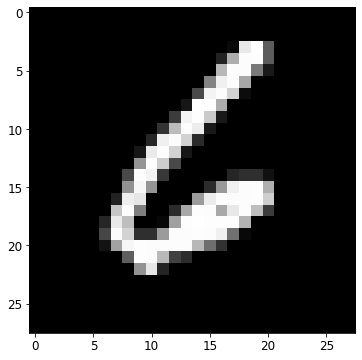

In [ ]:
print('The last sample is of digit:',y_train[-1])
plt.imshow(x_train[-1,:].reshape(28,28),cmap='gray')

## Common data
Build a classifier that differentiate digit 6 from digit 9.   
* Steps to be followed
    1. Collect all digit-6 (Positive class) and digit-9 (Negative class) images from `x_train` and stack them properly as a single datamatri  `x_train_69`. 
    2. Keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
    3. Similarly, collect the respective labels and store it in a variable `y_train_69`
    4. Set the label values to 1 for positive classes and 0 for negative classes.
    5. Load `from sklearn.utils import shuffle`
    6.  Shuffle the datamatrix and labels. (Set `random_state` value to 1729). <br>
    7. Create `x_test_69` and `y_test_69` by repeating the steps from 1 to 6 with required modifications



## Que 2.

 [1 point] What is the sum of all the labels in the vector `y_train_69`.
 [NAT]

 Ans:4855

 [1 point] What is the sum of all the labels in the vector `y_test_69`.
 [NAT] <br>
  Ans:2021

### Solution
Train set

In [ ]:
# get the index of dig6 and dig_9
dig_6_idx = np.where(y_train ==6)[0]
dig_9_idx = np.where(y_train ==9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx),axis=0)
# get all samples from the index array
x_train_69 = x_train[index,:]
# create the label vector
y_train_69 = np.concatenate((np.ones(len(dig_6_idx)),np.zeros(len(dig_9_idx))))

from sklearn.utils import shuffle
x_train_69,y_train_69 = shuffle(x_train_69,y_train_69,random_state=1729)


Test set

In [ ]:
# get the index of dig6 and dig_9
dig_6_idx = np.where(y_test ==6)[0]
dig_9_idx = np.where(y_test ==9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx),axis=0)
# get all samples from the index array
x_test_69 = x_test[index,:]
# create the label vector
y_test_69 = np.concatenate((np.ones(len(dig_6_idx)),np.zeros(len(dig_9_idx))))

from sklearn.utils import shuffle
x_test_69,y_test_69 = shuffle(x_test_69,y_test_69,random_state=1729)

In [ ]:
print('The sum of label vectors:',np.sum(y_train_69))
print('The sum of label vectors:',np.sum(y_test_69))

The sum of label vectors: 4855.0
The sum of label vectors: 2021.0


In [ ]:
print('The sum of label vectors:',np.count_nonzero(y_train==6))

The sum of label vectors: 4855


## Que 3.
[2 point] Apply `StandardScaler` to all the training samples in `x_train_69` and store the result in another variable (say, `x_train_69Tf`). 

    * What is the mean of the zeroth sample?
    * What is the mean of zeroth feature?
    * What is the standard deviation of the zeroth sample?
    * What is the standard deviation of the zeroth feature?
Pack the answers (in order) in a tuple

Options: <br>
1. (0,0,1,1) <br>
2. (0.081,0,0.73,1) <br>
3. (0.081,0,0.73,0)  <br>
4. (0,0.081,1.09,1) <br>

**Ans: 3**

### Solution:

In [ ]:
scaler = StandardScaler()
x_train_69Tf = scaler.fit_transform(x_train_69)

In [ ]:
print('Mean of 0th sample:',np.mean(x_train_69Tf[0,:]))
print('Mean of 0th sample:',np.mean(x_train_69Tf[:,0]))
print('Std of the 0th sample:',np.std(x_train_69Tf[0,:]))
print('Std of the 0th sample:',np.std(x_train_69Tf[:,0]))

Mean of 0th sample: 0.08128379559427823
Mean of 0th sample: 0.0
Std of the 0th sample: 0.7358823226037738
Std of the 0th sample: 0.0


## Que 4.

[6 point]Train the LogisticRegression model using SGDClassifier() with the following common settings.
  1. No Regularization <br>
  2. random_state : 10 <br>
  3. Iteration : 10 <br>

Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve decreased monotonically?

    A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `
    
    B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` .

    C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples. 

    D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

**Answer:** B,C,D

[0 point] How do you explain all these observations?


###**Solution:**

1.

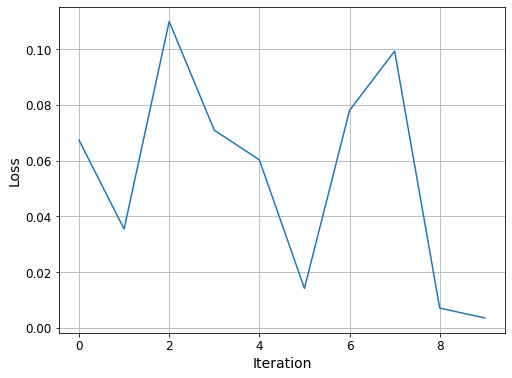

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= 10
for i in range(iterations):
  pipe_sgd.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

2. 

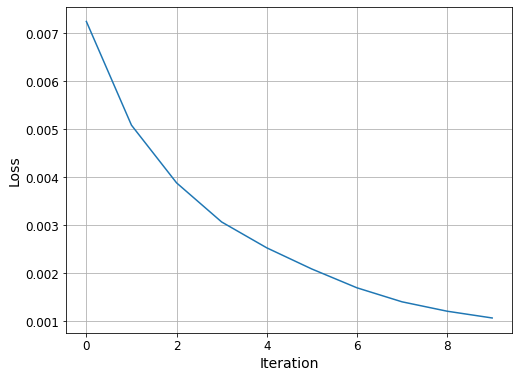

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.000001,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= 10
for i in range(iterations):
  pipe_sgd.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

3.

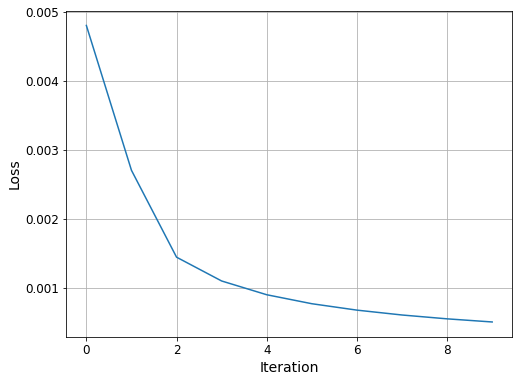

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd= make_pipeline(StandardScaler(),estimator)
Loss=[]
iterations= 10
for i in range(iterations):
  pipe_sgd.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

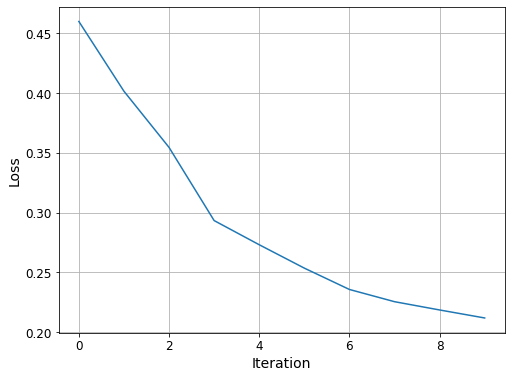

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        power_t =1.0,
                        learning_rate='invscaling',
                        random_state=10)
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= 10
for i in range(iterations):
  pipe_sgd.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Que 5.

[1 point] Train the LogisticRegression model using SGDClassifier() with the following common settings.
  1. No Regularization <br>
  2. random_state : 10 <br>
  3. Iteration : 30 <br>

Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve converged quickly to zero loss? 

    A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

    
    B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` . 

    
    C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.


    D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

**Answer:** A

[1 point] Enter the iteration number for which the loss becomes zero and remains zero for the rest of the iteration. [NAT}

Ans: 14




###**Solution:**

1.

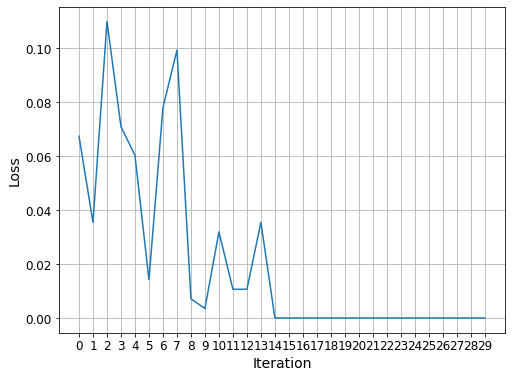

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd_A= make_pipeline(estimator)
Loss=[]
iterations= 30
for i in range(iterations):
  pipe_sgd_A.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd_A.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.xticks(ticks=np.arange(30),labels=np.arange(30))
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

2. 

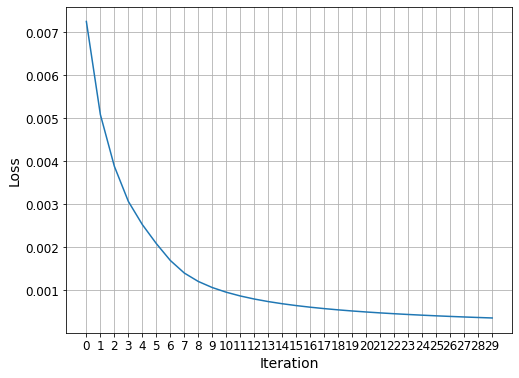

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.000001,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd_B= make_pipeline(estimator)
Loss=[]
iterations= 30
for i in range(iterations):
  pipe_sgd_B.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd_B.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.xticks(ticks=np.arange(30),labels=np.arange(30))
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

3.

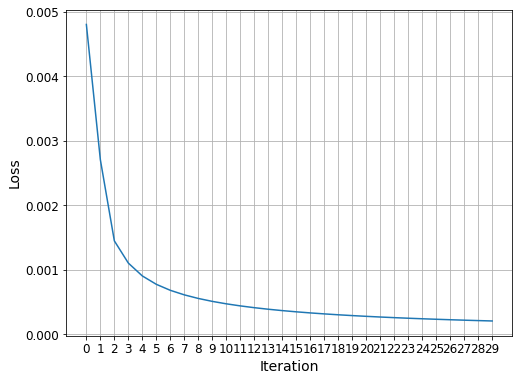

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd_C= make_pipeline(StandardScaler(),estimator)
Loss=[]
iterations= 30
for i in range(iterations):
  pipe_sgd_C.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd_C.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.xticks(ticks=np.arange(30),labels=np.arange(30))
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

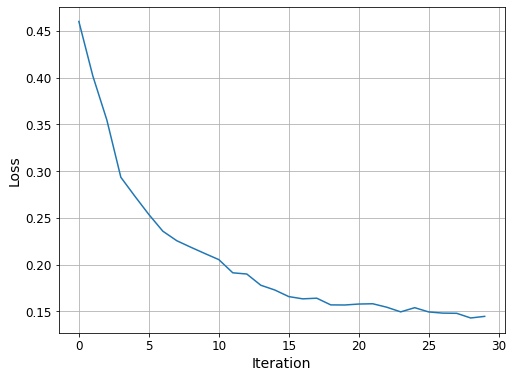

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        power_t =1.0,
                        learning_rate='invscaling',
                        random_state=10)
pipe_sgd_D= make_pipeline(estimator)
Loss=[]
iterations= 30
for i in range(iterations):
  pipe_sgd_D.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd_D.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
# plt.xticks(ticks=np.arange(30),labels=np.arange(30))
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Que 6

 * Setting-1 <br>
  Use a ridgeclassifier with the following settings <br>
  1. No regularization
  2. solver = 'svd' <br>

Fit the model with *x_train_69* without any preprocessing.Compute confusion matrix for the training set and bbserve the FN's and FP's.

 * Setting-2 <br>
The classifier essentially uses *svd* solver. <br>
Therefore, let us try to solve the problem directly using *np.linalg.pinv()* function.Find the following,

   $$w = X^{-1}y$$
using *np.linalg.pinv()* and predict the $\hat{y}$ using it.Compute the confusion matrix and observe the FN's and FP's.

[2 point] Are the counts for FNs and FPs almost same in both the setting? <br>

Options: <br>
   A.Yes <br>
   B.No <br>
   Ans: B <br>

* Setting-3 <br>
Change the labels to {-1,1} (1 for positive class and -1 for negative class). Now use the *np.linalg.pinv()* and predict the $\hat{y}$ using it.Compute the confusion matrix and observe the FN's and FP's.

[2 point] Are the counts for FNs and FPs almost same in both the setting-1 and setting-3? <br>
Options: <br>
   A.Yes <br>
   B.No <br>
   Ans: A <br>

[1 point] Does RidgeClassifier() internally converts labels to {-1,1}? <br>
Options: <br>
   A.Yes <br>
   B.No <br>
   Ans: A <br>
Contemplate the reasons.<br>
(**Hint:** Think of the concept of projection from linear algebra)



### Solution

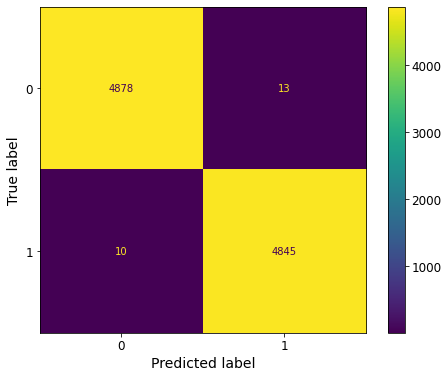

In [ ]:
estimator = RidgeClassifier(alpha=0)
estimator.fit(x_train_69,y_train_69)
y_pred = estimator.predict(x_train_69)
ConfusionMatrixDisplay.from_predictions(y_train_69,y_pred,labels=[0,1])
plt.show()

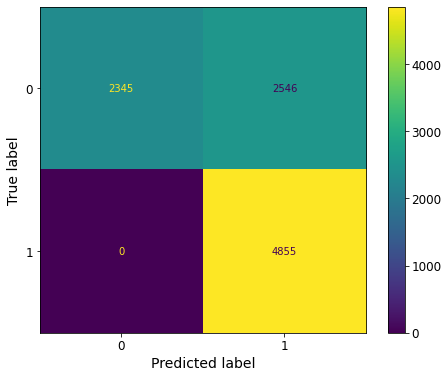

In [ ]:
w = np.linalg.pinv(x_train_69)@y_train_69
y_pred = np.where(x_train_69@w>0,1,0)
ConfusionMatrixDisplay.from_predictions(y_train_69,y_pred,labels=[0,1])
plt.show()

In [ ]:
y_train_69_binlab = np.where(y_train_69==0,-1,1)

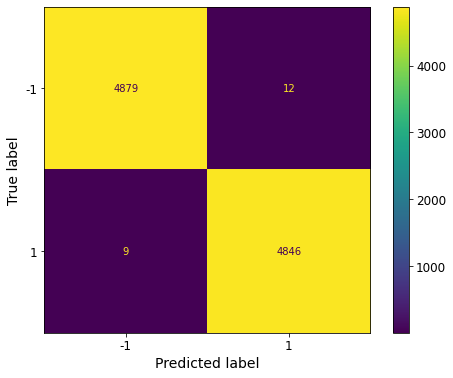

In [ ]:
w = np.linalg.pinv(x_train_69)@y_train_69_binlab
y_pred = np.where(x_train_69@w>0,1,-1)
ConfusionMatrixDisplay.from_predictions(y_train_69_binlab,y_pred,labels=[-1,1])
plt.show()

In [ ]:
y_pred = np.where(x_train_69@w>0,1,-1)

In [ ]:
np.mean(x_train_69)

33.21061976760743

## Que 7
Create the classifier with the following settings <br>

1. No Regularization
2. eta0 = 0.5
3. learning_rate = 'inv_scaling'
4. power_t = 0.5
5. iteration = 10
6. Shuffle  = True
7. random_state = 10

Train the classifier with `x_train_69`. Answer the following questions?

[1 points] How many False Positives (FP) are there? [NAT] <br>
**Ans:7** <br>

[2 points] Display all the False Positive samples.Could a human recognize them correctly?. Get the index of all FP samples in ascending order. Enter the first index. [NAT] <br> 
**Ans: 2167**




### Solution

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=10,
                        warm_start=False,
                        eta0=0.5,
                        alpha=0,
                        power_t =0.5,
                        learning_rate='invscaling',
                        shuffle=True,
                        random_state=10)
pipe_sgd = make_pipeline(estimator)
pipe_sgd.fit(x_train_69,y_train_69)

Pipeline(steps=[('sgdclassifier',
                 SGDClassifier(alpha=0, eta0=0.5, learning_rate='invscaling',
                               loss='log', max_iter=10, random_state=10))])

              precision    recall  f1-score   support

         0.0     0.9980    0.9986    0.9983      4891
         1.0     0.9986    0.9979    0.9982      4855

    accuracy                         0.9983      9746
   macro avg     0.9983    0.9983    0.9983      9746
weighted avg     0.9983    0.9983    0.9983      9746



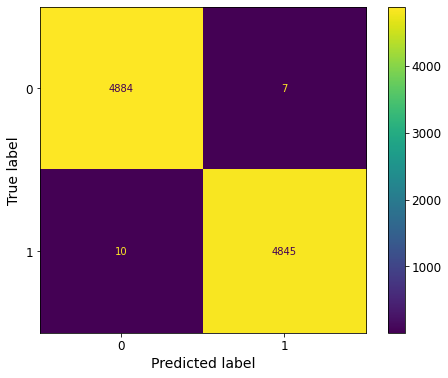

In [ ]:
y_pred = pipe_sgd.predict(x_train_69)
ConfusionMatrixDisplay.from_predictions(y_train_69,y_pred,labels=[0,1])
print(classification_report(y_train_69,y_pred,digits=4))

In [ ]:
all_neg_idx = np.where(y_train_69 == 0) # actual negative
pp_idx = np.where(y_pred == 1) # predicted positive
fp_idx = np.intersect1d(all_neg_idx,pp_idx) # it should be nil for FP=0
print(fp_idx)

[2167 2407 3036 3368 4217 5556 6230]


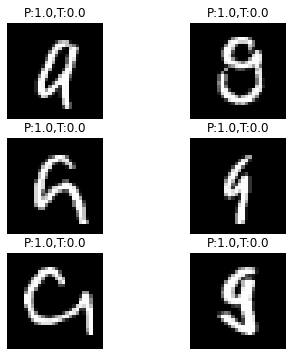

In [ ]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(6,6))
idx = 0
for i in range(3):  
  for j in range(2):
    ax[i,j].imshow(x_train_69[fp_idx[idx]].reshape(28,28),cmap='gray') # we should not use x_train_with_dummy
    ax[i,j].set_title('P:{0},T:{1}'.format(str(y_pred[fp_idx[idx]]),str(y_train_69[fp_idx[idx]])))
    ax[i,j].set_axis_off()
    idx += 1   

## Que 8

 * Let digit 6 samples in `x_train `as postive class (set labels of all digit 6 to 1) and all other digits as negative class ( set the labels to zero). Store the modified labels in a variable `y_train_6`. Repeat the same for `x_test`.
 
 * Create SGDClassifier() for logistic regression with the following parameter settings 
1. No Regularization
2. eta0 = 0.5
3. learning_rate = 'inv_scaling'
4. power_t = 0.5
5. iteration = 10
6. Shuffle  = True
7. random_state = 10

Scale the data samples and fit the model.What is the recall score (in the range of 0 to 1) of the model on the training set?

A.0.88 <br>
B.0.90 <br>
C.0.94 <br>
D.0.99 <br>

Ans: B, 0.90

[0 point] Compare the scores with that of previous setting.<br>
  * Did the performance increase in this setting? 
  * What could be the possible reasons for increase/decrease in the performance? 
  * What can be done to improve the performance further? 

## Solution

In [ ]:
y_train_6 = np.zeros((len(y_train)))
y_test_6 = np.zeros((len(y_test)))

# find indices of digit 6 image
indx_6 = np.where(y_train == 6) 
# use those indices to modify 
y_train_6[indx_6] = 1

# find indices of digit 6 image
indx_6 = np.where(y_test == 6) 
# use those indices to modify 
y_test_6[indx_6] = 1

### sanity check

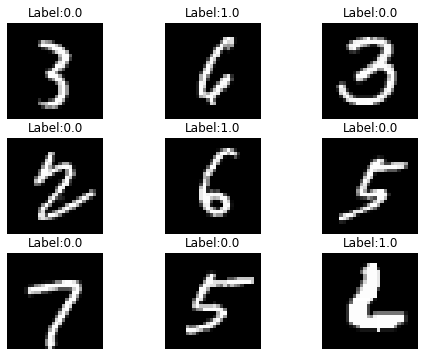

In [ ]:
num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset = 18 # take "num_images" starting from the index "idx_offset"
for i in range(factor):
  index = idx_offset+i*(factor)
  for j in range(factor):
    ax[i,j].imshow(x_test[index+j].reshape(28,28),cmap='gray')
    ax[i,j].set_title('Label:{0}'.format(str(y_test_6[index+j])))
    ax[i,j].set_axis_off()  


#### Train the model

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=10,
                        warm_start=False,
                        eta0=0.1,
                        alpha=0,
                        power_t =0.5,
                        learning_rate='invscaling',
                        shuffle=True,
                        random_state=10)

pipe_sgd = make_pipeline(MinMaxScaler(),estimator)
pipe_sgd.fit(x_train,y_train_6)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0, eta0=0.1, learning_rate='invscaling',
                               loss='log', max_iter=10, random_state=10))])

              precision    recall  f1-score   support

         0.0     0.9893    0.9930    0.9912     44145
         1.0     0.9343    0.9024    0.9181      4855

    accuracy                         0.9840     49000
   macro avg     0.9618    0.9477    0.9546     49000
weighted avg     0.9839    0.9840    0.9839     49000



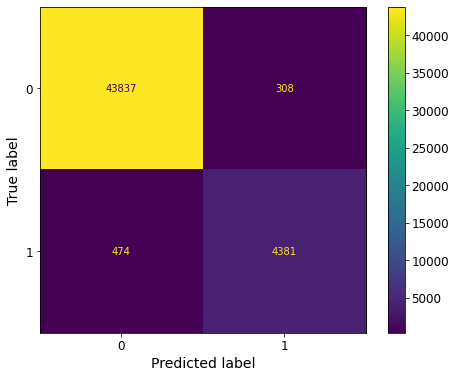

In [ ]:
y_pred = pipe_sgd.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train_6,y_pred,labels=[0,1])
print(classification_report(y_train_6,y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9906    0.9934    0.9920     18979
         1.0     0.9360    0.9119    0.9238      2021

    accuracy                         0.9855     21000
   macro avg     0.9633    0.9526    0.9579     21000
weighted avg     0.9854    0.9855    0.9854     21000



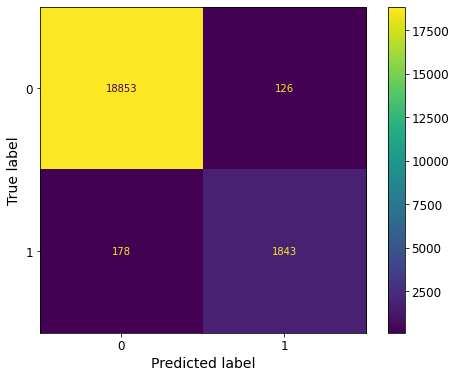

In [ ]:
y_pred = pipe_sgd.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_6,y_pred,labels=[0,1])
print(classification_report(y_test_6,y_pred,digits=4))

## Que 9

Assuming that model recall score might get increase if we change the `eta0` value and ***power_t*** value for `inv_scaling` learning rate decay approach.Try out the following combinations using grid search, <br>

  eta0 = [0.1,0.2,0.3,0.4,0.5] <br>
  power_t = [0.2,0.4] <br>

 Make use of pipeline while doing gridsearch and do 5 fold cv with `StartifiedKfold `.
 
Select the combination of parameters (eta0,power_t) which resulted in worst performance in terms of recall score

 A.(0.1,0.2) <br>
 B.(0.2,0.2) <br>
 C.(0.2,0.4) <br>
 D.(0.5,0.2) <br>
 E.(0.5,0.1) <br>
 F.(0.4,0.4) <br>

 Ans: D.

   

### Solution

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=10,
                        warm_start=False,
                        eta0=0.1,
                        alpha=0,
                        power_t = 0.5,
                        learning_rate='invscaling',
                        shuffle=True,
                        random_state=10)
pipe_sgd = make_pipeline(MinMaxScaler(),estimator)
# scoring = make_scorer(log_loss,greater_is_better=False)
eta0 = [0.1,0.2,0.3,0.4,0.5]
power_t = [0.2,0.4]
bin_clf_gscv = GridSearchCV(pipe_sgd,param_grid={"sgdclassifier__eta0":eta0,"sgdclassifier__power_t":power_t},scoring='recall',cv=5)
bin_clf_gscv.fit(x_train,y_train_6)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0, eta0=0.1,
                                                      learning_rate='invscaling',
                                                      loss='log', max_iter=10,
                                                      random_state=10))]),
             param_grid={'sgdclassifier__eta0': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'sgdclassifier__power_t': [0.2, 0.4]},
             scoring='recall')

In [ ]:
bin_clf_gscv.cv_results_

{'mean_fit_time': array([1.47576127, 1.61355515, 1.72812777, 1.55643902, 1.51830058,
        1.35718865, 1.51251054, 1.3628859 , 1.52800336, 1.33071322]),
 'std_fit_time': array([0.05619378, 0.17483451, 0.29279222, 0.19994077, 0.00687635,
        0.06081255, 0.01140723, 0.06161026, 0.01048528, 0.05416222]),
 'mean_score_time': array([0.06132936, 0.06094303, 0.06350737, 0.06039824, 0.06025887,
        0.05981078, 0.06091352, 0.0612103 , 0.06066704, 0.06072478]),
 'std_score_time': array([0.00113328, 0.0020783 , 0.00377277, 0.00131171, 0.00054351,
        0.00090378, 0.0011533 , 0.0021199 , 0.00139759, 0.00097935]),
 'param_sgdclassifier__eta0': masked_array(data=[0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_sgdclassifier__power_t': masked_array(data=[0.2, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.4],
            

## Que 10 

  * Ues the same estimator from the previous question. Take the 3rd best  combination of *eta0* and` power_t` from the CV results. Fit the same model and plot the threshold vs recall cuve and threshold vs precision curve on single graph . <br>
  Select the threshold value(s) around which the recall score and precision score are equal. <br>

  A. 1.09 <br>
  B. 2.09 <br>
  C. 0 <br>
  D. -1.09 <br>
  E. -2.09 <br>

  Ans: D

### Solution

In [ ]:
estimator = SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=10,
                        warm_start=False,
                        eta0=0.4,
                        alpha=0,
                        power_t = 0.2,
                        learning_rate='invscaling',
                        shuffle=True,
                        random_state=10)
pipe_sgd = make_pipeline(MinMaxScaler(),estimator)

In [ ]:
pipe_sgd.fit(x_train,y_train_6)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0, eta0=0.4, learning_rate='invscaling',
                               loss='log', max_iter=10, power_t=0.2,
                               random_state=10))])

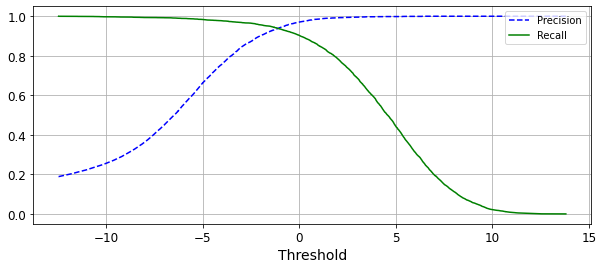

In [ ]:
y_scores = pipe_sgd.decision_function(x_train)
precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores,pos_label=1)
plt.figure(figsize=(10,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
index = np.where(precisions==recalls)
print('Precision:{0},Recall:{1},Threshold:{2}'.format(precisions[index],recalls[index],thresholds[index]))

Precision:[0.93820803],Recall:[0.93820803],Threshold:[-1.0957425]


Graded Q5

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
data = fetch_20newsgroups()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
newsgroups_train = fetch_20newsgroups(categories=categories)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 130107)